<a href="https://colab.research.google.com/github/PRARTHANA-G01/Stock_market_prediction/blob/main/Test_TSLA_trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
!pip install vaderSentiment

In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [ ]:
tweets_df_textblob = pd.read_csv(r'D:\MsADS\DataAnalytic in Business\IDA Project\stock_tweets.csv',parse_dates=['Date'])
tweets_df_vader = pd.read_csv(r'D:\MsADS\DataAnalytic in Business\IDA Project\stock_tweets.csv',parse_dates=['Date'])
stock_prices_df = pd.read_csv(r'D:\MsADS\DataAnalytic in Business\IDA Project\stock_yfinance_data.csv',parse_dates=['Date'], dayfirst=True)

In [ ]:
tsla_tweets_df_textblob = tweets_df_textblob.loc[tweets_df_textblob['Stock Name'] == 'TSLA']
tsla_tweets_df_vader = tweets_df_vader.loc[tweets_df_vader['Stock Name'] == 'TSLA']
tsla_stock_prices_df = stock_prices_df.loc[stock_prices_df['Stock Name'] == 'TSLA']

In [ ]:
print(tsla_tweets_df_textblob.columns)
print(tsla_tweets_df_vader.columns)
print(tsla_stock_prices_df.columns)

Index(['Date', 'Tweet', 'Stock Name', 'Company Name'], dtype='object')
Index(['Date', 'Tweet', 'Stock Name', 'Company Name'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Stock Name'],
      dtype='object')


In [ ]:
# Check the size of the TSLA dataset for textblob
print(f"Number of TSLA-related tweets: {tsla_tweets_df_textblob.shape[0]}")

# Display the first few rows to verify
tsla_tweets_df_textblob.head()

Number of TSLA-related tweets: 37422


,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [ ]:
# Check the size of the TSLA dataset for VADER
print(f"Number of TSLA-related tweets: {tsla_tweets_df_vader.shape[0]}")

# Display the first few rows to verify
tsla_tweets_df_vader.head()

Number of TSLA-related tweets: 37422


,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [ ]:
# Check the size of the TSLA dataset for stock price
print(f"Number of TSLA-related stock info: {tsla_stock_prices_df.shape[0]}")

# Display the first few rows to verify
tsla_stock_prices_df.head()

Number of TSLA-related stock info: 252


,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


In [ ]:
# Remove timezone info to make both columns timezone-naive
tsla_tweets_df_textblob['Date'] = pd.to_datetime(tsla_tweets_df_textblob['Date']).dt.tz_localize(None)
tsla_tweets_df_textblob['Date'] = pd.to_datetime(tsla_tweets_df_textblob['Date'].dt.date)

tsla_tweets_df_vader['Date'] = pd.to_datetime(tsla_tweets_df_vader['Date']).dt.tz_localize(None)
tsla_tweets_df_vader['Date'] = pd.to_datetime(tsla_tweets_df_vader['Date'].dt.date)

tsla_stock_prices_df['Date'] = pd.to_datetime(tsla_stock_prices_df['Date']).dt.tz_localize(None)

tsla_tweets_df_textblob.set_index('Date', inplace=True)
tsla_tweets_df_vader.set_index('Date', inplace=True)
tsla_stock_prices_df.set_index('Date', inplace=True)

start_date = max(tsla_tweets_df_textblob.index.min(), tsla_stock_prices_df.index.min())
end_date = min(tsla_tweets_df_textblob.index.max(), tsla_stock_prices_df.index.max())

print("Common Date Range:")
print(f"Start Date: {start_date.strftime('%Y-%m-%d')}")
print(f"End Date: {end_date.strftime('%Y-%m-%d')}")

Common Date Range:
Start Date: 2021-09-30
End Date: 2022-09-29


C:\Users\kumar\AppData\Local\Temp\ipykernel_3256\2744267612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_tweets_df_textblob['Date'] = pd.to_datetime(tsla_tweets_df_textblob['Date']).dt.tz_localize(None)
C:\Users\kumar\AppData\Local\Temp\ipykernel_3256\2744267612.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_tweets_df_textblob['Date'] = pd.to_datetime(tsla_tweets_df_textblob['Date'].dt.date)
C:\Users\kumar\AppData\Local\Temp\ipykernel_3256\2744267612.py:5: SettingWithCopyWarning: 
A va

In [ ]:
# Feature Engineering for stock prices
tsla_stock_prices_df['fluctuation'] = tsla_stock_prices_df['High'] - tsla_stock_prices_df['Low']
tsla_stock_prices_df['price_gain'] = tsla_stock_prices_df['Close'] - tsla_stock_prices_df['Open']
tsla_stock_prices_df['total_valuation_eod'] = tsla_stock_prices_df['Volume'] * tsla_stock_prices_df['Close']

C:\Users\kumar\AppData\Local\Temp\ipykernel_3256\156000893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_stock_prices_df['fluctuation'] = tsla_stock_prices_df['High'] - tsla_stock_prices_df['Low']
C:\Users\kumar\AppData\Local\Temp\ipykernel_3256\156000893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_stock_prices_df['price_gain'] = tsla_stock_prices_df['Close'] - tsla_stock_prices_df['Open']
C:\Users\kumar\AppData\Local\Temp\ipykernel_3256\156000893.py:4: SettingWithCopyWarning: 
A val

In [ ]:
import re

def clean_tweet(text):

    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtag symbol
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove special characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Remove emojis and non-ASCII characters
    text = text.lower()  # Convert text to lowercase
    return text

# Apply the cleaning function to the 'Tweet' column
tsla_tweets_df_textblob['Cleaned Tweet'] = tsla_tweets_df_textblob['Tweet'].apply(clean_tweet)
tsla_tweets_df_vader['Cleaned Tweet'] = tsla_tweets_df_vader['Tweet'].apply(clean_tweet)

C:\Users\kumar\AppData\Local\Temp\ipykernel_3256\3420862361.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_tweets_df_textblob['Cleaned Tweet'] = tsla_tweets_df_textblob['Tweet'].apply(clean_tweet)
C:\Users\kumar\AppData\Local\Temp\ipykernel_3256\3420862361.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_tweets_df_vader['Cleaned Tweet'] = tsla_tweets_df_vader['Tweet'].apply(clean_tweet)


In [ ]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


# Function to get sentiment scores
def analyze_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']  # Use the compound score as the overall sentiment score

# Apply the sentiment analysis to each cleaned tweet
tsla_tweets_df_vader['Sentiment Score'] = tsla_tweets_df_vader['Cleaned Tweet'].apply(analyze_sentiment)
tsla_tweets_df_vader.columns = tsla_tweets_df_vader.columns.str.strip()  # Remove leading/trailing spaces

# Display the first few rows of the updated dataset with sentiment scores
tsla_tweets_df_vader.head()

C:\Users\kumar\AppData\Local\Temp\ipykernel_3256\1327046183.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_tweets_df_vader['Sentiment Score'] = tsla_tweets_df_vader['Cleaned Tweet'].apply(analyze_sentiment)


,Tweet,Stock Name,Company Name,Cleaned Tweet,Sentiment Score
Date,,,,,
2022-09-29,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",mainstream media has done an amazing job at br...,0.0772
2022-09-29,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",tesla delivery estimates are at around 364k fr...,0.0000
2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",3 even if i include 630m unvested rsus as of 6...,0.2960
2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",hahaha why are you still trying to stop tes...,-0.7096
2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",stop trying to kill kids you sad deranged ol...,-0.8750


In [ ]:
# Create sentiment categories
tsla_tweets_df_vader['positive'] = tsla_tweets_df_vader['Sentiment Score'].apply(lambda x: 1 if x > 0.05 else 0)
tsla_tweets_df_vader['negative'] = tsla_tweets_df_vader['Sentiment Score'].apply(lambda x: 1 if x < -0.05 else 0)
tsla_tweets_df_vader['neutral'] = tsla_tweets_df_vader['Sentiment Score'].apply(lambda x: 1 if -0.05<=x <=0.05 else 0)

C:\Users\kumar\AppData\Local\Temp\ipykernel_3256\4285212084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_tweets_df_vader['positive'] = tsla_tweets_df_vader['Sentiment Score'].apply(lambda x: 1 if x > 0.05 else 0)
C:\Users\kumar\AppData\Local\Temp\ipykernel_3256\4285212084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_tweets_df_vader['negative'] = tsla_tweets_df_vader['Sentiment Score'].apply(lambda x: 1 if x < -0.05 else 0)
C:\Users\kumar\AppData\Local\Temp\ipykernel_3256\4285212084.p

In [ ]:
tsla_tweets_df_vader.head()

,Tweet,Stock Name,Company Name,Cleaned Tweet,Sentiment Score,positive,negative,neutral
Date,,,,,,,,
2022-09-29,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",mainstream media has done an amazing job at br...,0.0772,1,0,0
2022-09-29,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",tesla delivery estimates are at around 364k fr...,0.0000,0,0,1
2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",3 even if i include 630m unvested rsus as of 6...,0.2960,1,0,0
2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",hahaha why are you still trying to stop tes...,-0.7096,0,1,0
2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",stop trying to kill kids you sad deranged ol...,-0.8750,0,1,0


In [ ]:
# Aggregate sentiment scores by date (mean sentiment score for each day)
tsla_daily_sentiment_vader = tsla_tweets_df_vader.groupby('Date')['Sentiment Score'].mean().reset_index()

# Generate sentiment score and comment count based on date
tsla_daily_sentiment_vader = tsla_tweets_df_vader.groupby('Date').agg(
    positive_count=('positive', 'sum'),
    negative_count=('negative', 'sum'),
    neutral_count=('neutral', 'sum'),
    average_sentiment_score=('Sentiment Score', 'mean')
).reset_index()

# Display the daily sentiment scores
tsla_daily_sentiment_vader.head()

,Date,positive_count,negative_count,neutral_count,average_sentiment_score
0,2021-09-30,54,23,13,0.245999
1,2021-10-01,50,16,28,0.211813
2,2021-10-02,61,18,37,0.236854
3,2021-10-03,36,11,14,0.262636
4,2021-10-04,51,22,46,0.121086


In [ ]:
# Input data visualisation

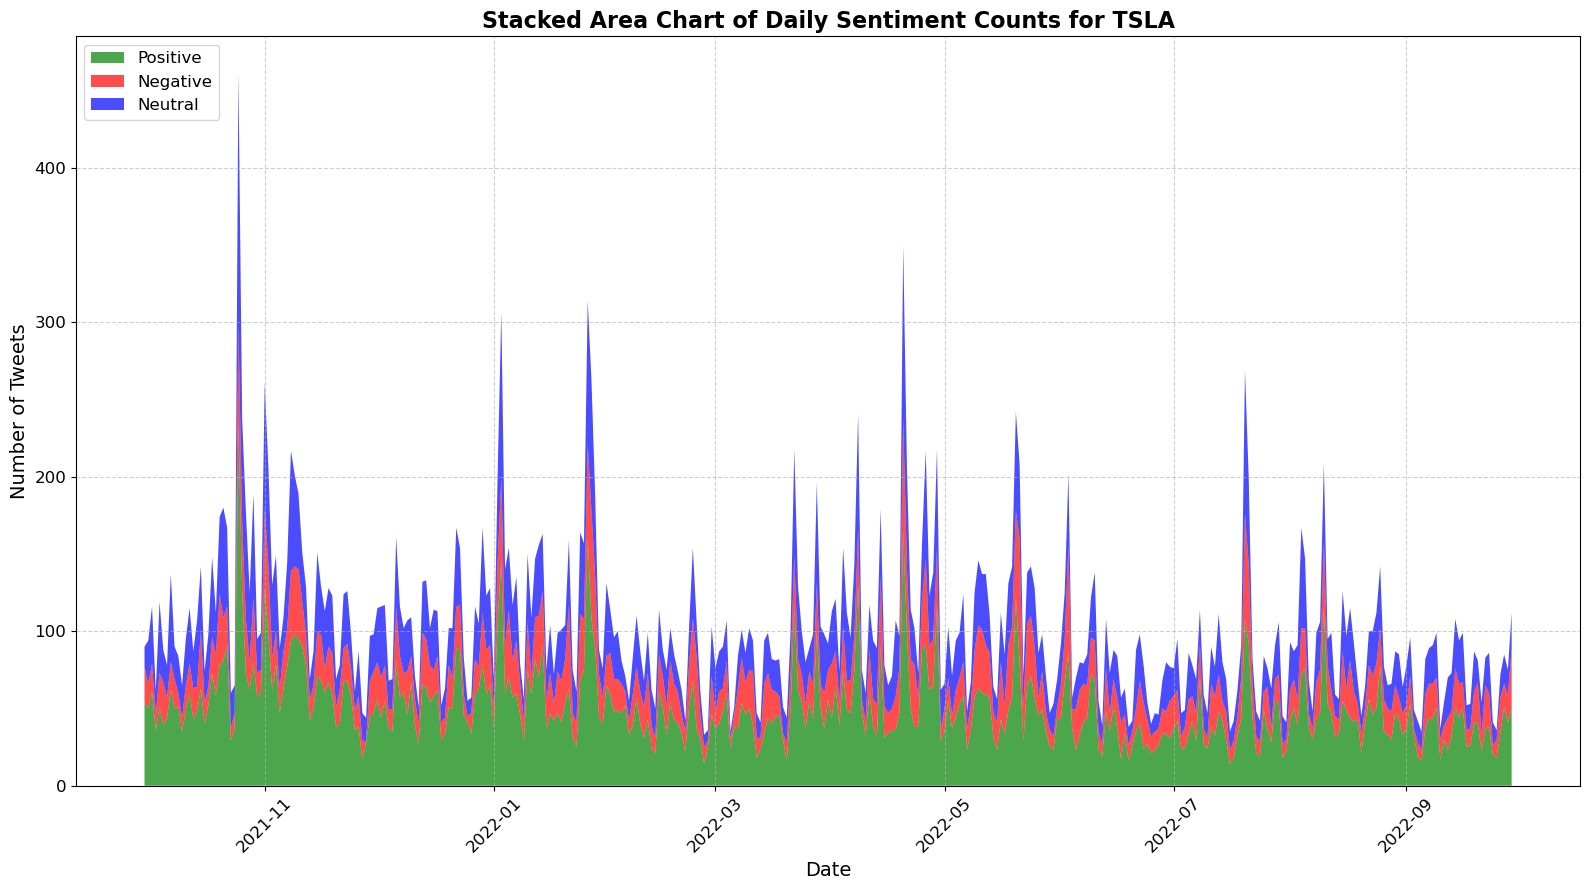

In [ ]:
# Visualization for comment count
dates = tsla_daily_sentiment_vader['Date']
positive_counts = tsla_daily_sentiment_vader['positive_count']
negative_counts = tsla_daily_sentiment_vader['negative_count']
neutral_counts = tsla_daily_sentiment_vader['neutral_count']

import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
plt.stackplot(dates, positive_counts, negative_counts, neutral_counts, labels=['Positive', 'Negative', 'Neutral'], colors=['green', 'red', 'blue'], alpha=0.7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=14)
plt.title('Stacked Area Chart of Daily Sentiment Counts for TSLA', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Merge the daily sentiment scores with the stock prices on the 'Date' column
tsla_merged_data = pd.merge(tsla_stock_prices_df, tsla_daily_sentiment_vader, on='Date', how='inner')

# Display the first few rows of the merged dataset
tsla_merged_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,fluctuation,price_gain,total_valuation_eod,positive_count,negative_count,neutral_count,average_sentiment_score
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,4.709992,-1.839996,1.392452e+10,54,23,13,0.245999
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA,5.730011,-1.059998,1.320308e+10,50,16,28,0.211813
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA,10.283325,-4.989990,2.382361e+10,51,22,46,0.121086
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA,7.703308,-1.403351,1.438830e+10,39,28,21,0.081674
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA,4.480011,2.183319,1.145382e+10,44,13,21,0.214333


In [ ]:
# Create the target variable (upward/downward trend based on next day's closing price)
tsla_merged_data['price_trend'] = np.where(tsla_merged_data['Close'].shift(-1) > tsla_merged_data['Close'], 1, 0)

# Remove the last row where the target can't be determined (because there's no next day price)
tsla_merged_data.dropna(subset=['price_trend'], inplace=True)


tsla_merged_data

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,fluctuation,price_gain,total_valuation_eod,positive_count,negative_count,neutral_count,average_sentiment_score,price_trend
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,4.709992,-1.839996,1.392452e+10,54,23,13,0.245999,0
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA,5.730011,-1.059998,1.320308e+10,50,16,28,0.211813,1
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA,10.283325,-4.989990,2.382361e+10,51,22,46,0.121086,0
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA,7.703308,-1.403351,1.438830e+10,39,28,21,0.081674,1
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA,4.480011,2.183319,1.145382e+10,44,13,21,0.214333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63748400,TSLA,11.679993,-7.760010,1.755185e+10,38,22,26,0.129547,1
248,2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900,TSLA,13.779999,4.180023,1.602981e+10,34,23,15,0.117128,1
249,2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200,TSLA,11.160004,-0.899994,1.752112e+10,51,15,19,0.197749,1
250,2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800,TSLA,11.429993,4.730011,1.573308e+10,41,18,16,0.156255,0


In [ ]:
# Random Forest

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
# Define the features and target

tsla_merged_data[f'Close_lag{1}'] = tsla_merged_data['Close'].shift(1)
tsla_merged_data[f'average_sentiment_score_lag{1}'] = tsla_merged_data['average_sentiment_score'].shift(1)

tsla_merged_data['MA5'] = tsla_merged_data['Close_lag1'].rolling(window=5).mean()
tsla_merged_data['MA10'] = tsla_merged_data['Close_lag1'].rolling(window=10).mean()

tsla_merged_data.dropna(inplace=True)

features = [
    'positive_count', 'negative_count', 'average_sentiment_score',
    'Close_lag1',
    'average_sentiment_score_lag1',
    'MA5', 'MA10'
]

X = tsla_merged_data[features]
y = tsla_merged_data['price_trend']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Check the shapes of the features and target
print(X.shape, y.shape)

(242, 7) (242,)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

price_trend
1    101
0     92
Name: count, dtype: int64
price_trend
1    25
0    24
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_leaf=5,
    random_state=42,
    class_weight='balanced'
)
model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=5,
                       random_state=42)

In [ ]:
# Predict with trained model
y_pred = model.predict(X_test)

In [ ]:
y_train_pred = model.predict(X_train)
f1_train = f1_score(y_train, y_train_pred)
print(f'Training F1 Score: {f1_train:.2f}')

y_test_pred = model.predict(X_test)
f1_test = f1_score(y_test, y_test_pred)
print(f'Test F1 Score: {f1_test:.2f}')
# The result means that is overfitting

Training F1 Score: 0.84
Test F1 Score: 0.50


In [ ]:

print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))


Training Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        92
           1       0.86      0.82      0.84       101

    accuracy                           0.83       193
   macro avg       0.83      0.83      0.83       193
weighted avg       0.84      0.83      0.83       193

Test Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.42      0.43        24
           1       0.48      0.52      0.50        25

    accuracy                           0.47        49
   macro avg       0.47      0.47      0.47        49
weighted avg       0.47      0.47      0.47        49



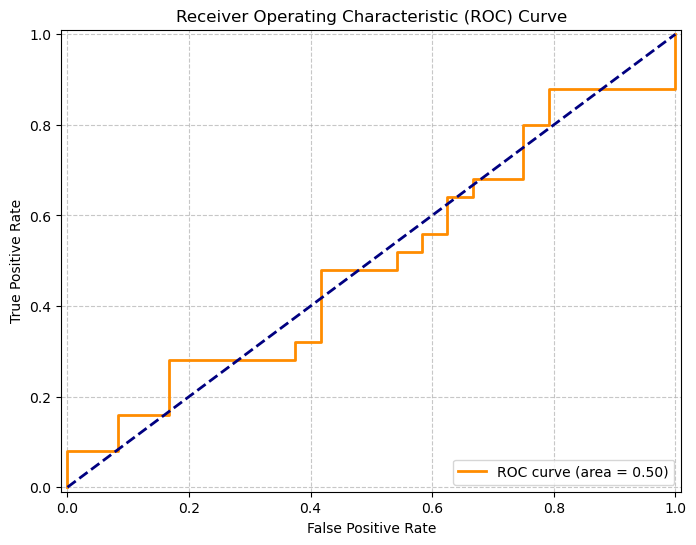

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_score = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(linestyle='--', alpha=0.7)
plt.show()


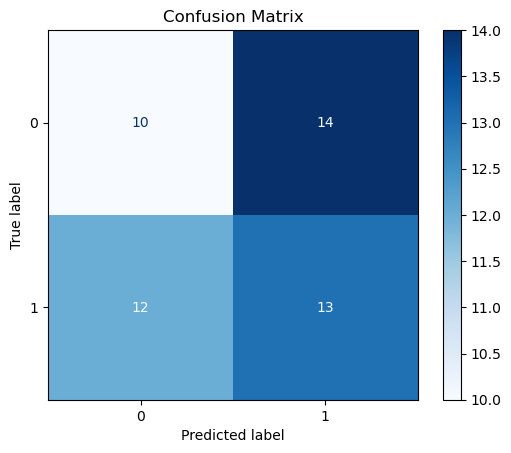

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


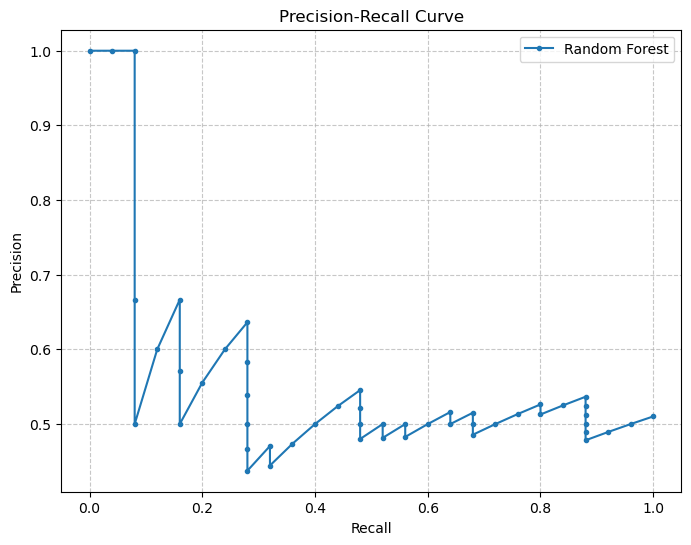

In [ ]:
from sklearn.metrics import precision_recall_curve

y_scores = model.predict_proba(X_test)[:, 1]


precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.show()


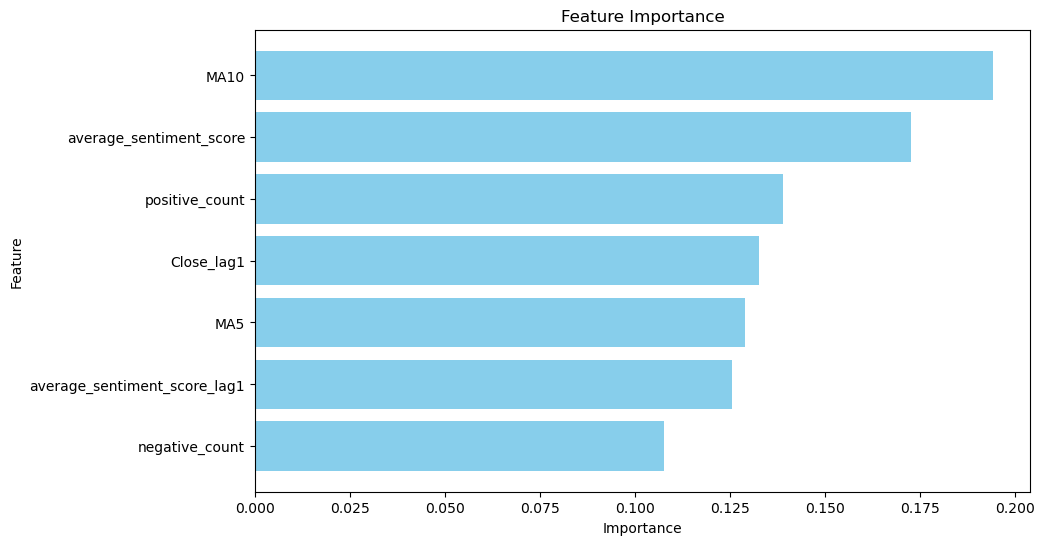

In [ ]:
importances = model.feature_importances_
feature_names = features

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
#  -------------------------------------------------------------------------------------------------- #

In [ ]:
# Based on the result, we need to improve the model

In [ ]:
#Text blob method

In [ ]:
#Implement TextBlob
from textblob import TextBlob

# Define a function to get polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Define a function to get subjectivity
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Apply the functions to the DataFrame
tsla_tweets_df_textblob['Polarity'] = tsla_tweets_df_textblob['Cleaned Tweet'].apply(get_polarity)
tsla_tweets_df_textblob['Subjectivity'] = tsla_tweets_df_textblob['Cleaned Tweet'].apply(get_subjectivity)

C:\Users\kumar\AppData\Local\Temp\ipykernel_3256\3999477825.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_tweets_df_textblob['Polarity'] = tsla_tweets_df_textblob['Cleaned Tweet'].apply(get_polarity)
C:\Users\kumar\AppData\Local\Temp\ipykernel_3256\3999477825.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_tweets_df_textblob['Subjectivity'] = tsla_tweets_df_textblob['Cleaned Tweet'].apply(get_subjectivity)


In [ ]:
tsla_tweets_df_textblob.head()

,Tweet,Stock Name,Company Name,Cleaned Tweet,Polarity,Subjectivity
Date,,,,,,
2022-09-29,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",mainstream media has done an amazing job at br...,0.600000,0.900000
2022-09-29,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",tesla delivery estimates are at around 364k fr...,0.000000,0.000000
2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",3 even if i include 630m unvested rsus as of 6...,0.018182,0.277273
2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",hahaha why are you still trying to stop tes...,0.066667,0.433333
2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",stop trying to kill kids you sad deranged ol...,-0.200000,0.600000


In [ ]:
# Aggregate daily sentiment counts
daily_sentiment_textblob = tsla_tweets_df_textblob.groupby('Date').agg(
    Polarity_Avg=('Polarity', 'sum'),
    Subjectivity_Avg=('Subjectivity', 'mean')
).reset_index()

daily_sentiment_textblob.head()

,Date,Polarity_Avg,Subjectivity_Avg
0,2021-09-30,11.707304,0.394968
1,2021-10-01,10.124931,0.381709
2,2021-10-02,16.214322,0.422918
3,2021-10-03,8.728770,0.457878
4,2021-10-04,10.817229,0.389383


In [ ]:
# Merge the daily sentiment data with stock prices on the date
merged_data_textblob = pd.merge(tsla_stock_prices_df, daily_sentiment_textblob, on='Date', how='inner')

# Create the target variable 'price_trend' (1 for upward, 0 for downward trend)
merged_data_textblob['price_trend'] = np.where(merged_data_textblob['Close'].shift(-1) > merged_data_textblob['Close'], 1, 0)

# Drop rows where target can't be determined (e.g., the last row)
merged_data_textblob.dropna(subset=['price_trend'], inplace=True)

In [ ]:
merged_data_textblob.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,fluctuation,price_gain,total_valuation_eod,Polarity_Avg,Subjectivity_Avg,price_trend
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,4.709992,-1.839996,1.392452e+10,11.707304,0.394968,0
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA,5.730011,-1.059998,1.320308e+10,10.124931,0.381709,1
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA,10.283325,-4.989990,2.382361e+10,10.817229,0.389383,0
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA,7.703308,-1.403351,1.438830e+10,8.913883,0.388442,1
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA,4.480011,2.183319,1.145382e+10,12.377199,0.376661,1


In [ ]:
'''
# Define features and target
features = ['fluctuation', 'price_gain', 'total_valuation_eod', 'Polarity_Avg', 'Subjectivity_Avg']
X = merged_data_textblob[features]
y = merged_data_textblob['price_trend']
'''

In [ ]:
# Random Forest

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
# Define the features and target

merged_data_textblob[f'Close_lag{1}'] = merged_data_textblob['Close'].shift(1)
merged_data_textblob[f'Polarity_Avg_lag{1}'] = merged_data_textblob['Polarity_Avg'].shift(1)
merged_data_textblob[f'Subjectivity_Avg_lag{1}'] = merged_data_textblob['Subjectivity_Avg'].shift(1)

merged_data_textblob['MA5'] = merged_data_textblob['Close_lag1'].rolling(window=5).mean()
merged_data_textblob['MA10'] = merged_data_textblob['Close_lag1'].rolling(window=10).mean()

merged_data_textblob.dropna(inplace=True)

features = [
    'Polarity_Avg', 'Subjectivity_Avg',
    'Close_lag1',
    'Polarity_Avg_lag1',
    'Subjectivity_Avg_lag1',
    'MA5', 'MA10'
]

X = merged_data_textblob[features]
y = merged_data_textblob['price_trend']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Check the shapes of the features and target
print(X.shape, y.shape)

(222, 7) (222,)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

price_trend
1    90
0    87
Name: count, dtype: int64
price_trend
1    23
0    22
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_leaf=5,
    random_state=42,
    class_weight='balanced'
)
model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=5,
                       random_state=42)

In [ ]:
# Predict with trained model
y_pred = model.predict(X_test)

In [ ]:
y_train_pred = model.predict(X_train)
f1_train = f1_score(y_train, y_train_pred)
print(f'Training F1 Score: {f1_train:.2f}')

y_test_pred = model.predict(X_test)
f1_test = f1_score(y_test, y_test_pred)
print(f'Test F1 Score: {f1_test:.2f}')
# The result means that is overfitting

Training F1 Score: 0.86
Test F1 Score: 0.52


In [ ]:

print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))


Training Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        87
           1       0.85      0.87      0.86        90

    accuracy                           0.85       177
   macro avg       0.85      0.85      0.85       177
weighted avg       0.85      0.85      0.85       177

Test Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.36      0.40        22
           1       0.48      0.57      0.52        23

    accuracy                           0.47        45
   macro avg       0.46      0.46      0.46        45
weighted avg       0.46      0.47      0.46        45



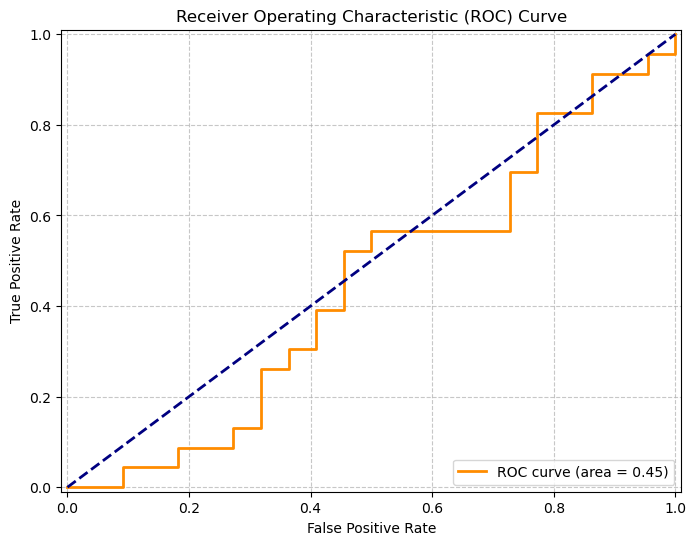

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_score = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(linestyle='--', alpha=0.7)
plt.show()


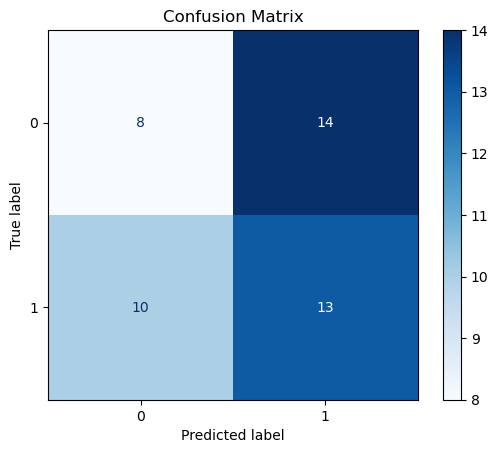

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

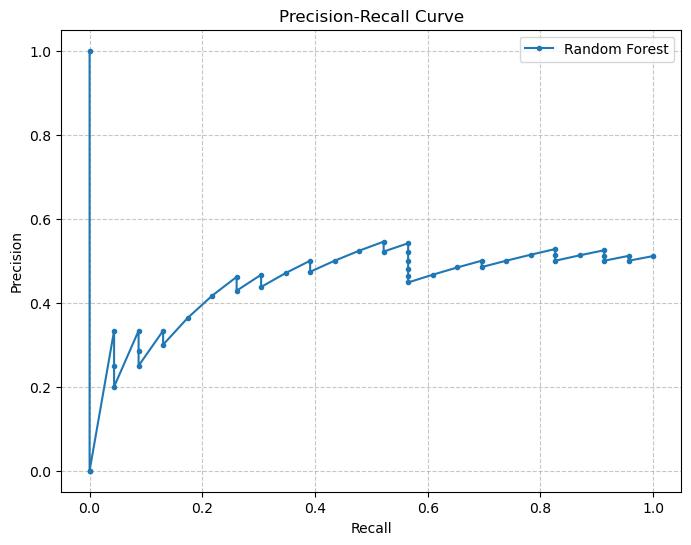

In [ ]:
from sklearn.metrics import precision_recall_curve

y_scores = model.predict_proba(X_test)[:, 1]


precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.show()


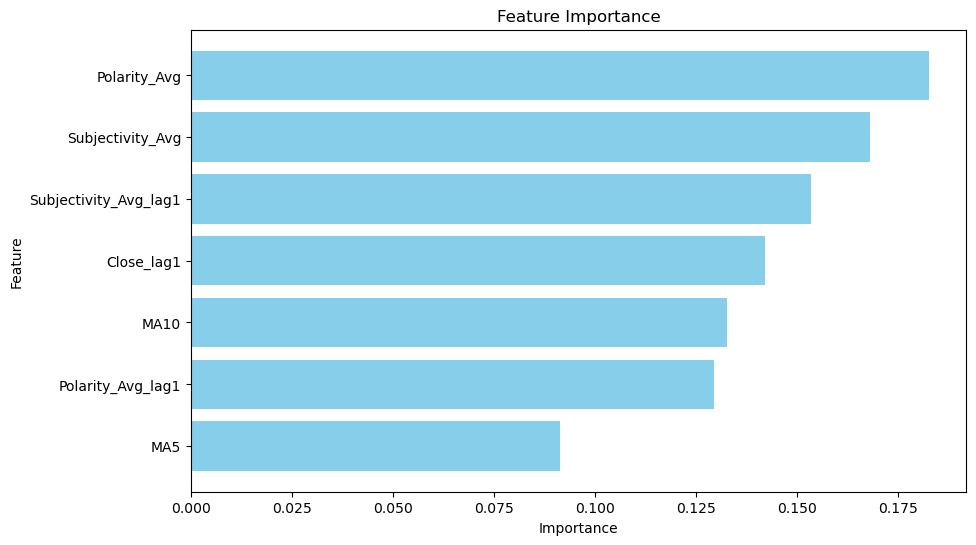

In [ ]:
importances = model.feature_importances_
feature_names = features

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()
